In [95]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import time

In [4]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

/Users/tangjimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
plt.errorbar(data = plofit, x = plofit['release_year'], y = 'plofit')

In [2]:
np.log(10)

2.302585092994046

In [2]:
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

In [15]:
data = {train_dir: 1, valid_dir: 2, test_dir: 3}
data

{'train': 1, 'valid': 2, 'test': 3}

In [13]:
data_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

NameError: name 'transforms' is not defined

In [ ]:
data_dir = 'aipnd-project/flowers/'
data_transforms = {
    train_dir: transforms.Compose([
        transforms.RandomRotation(30)
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    valid_dir: transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    test_dir:transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
image_datasets = {x: datasets.ImageFolder(
                    os.path.join(data_dir, x),
                    data_transforms[x])， 
                    for x in [train_dir, valid_dir, test_dir]}
dataloders = {x: torch.utils.data.DataLoader(image_datasets[x],     
                                            batch_size=64, 
                                            shuffle=True) 
                                            for x in [train_dir, valid_dir, test_dir]}


In [ ]:
# TODO: Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(
                    os.path.join(data_dir, x),
                    data_transforms[x])， 
                    for x in [train_dir, valid_dir, test_dir]}


# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloders = {x: torch.utils.data.DataLoader(image_datasets[x],     
                                            batch_size=64, 
                                            shuffle=True) 
                                            for x in [train_dir, valid_dir, test_dir]}



In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from PIL import Image, ImageDraw
image = Image.open("j.jpg")
image.format
w = image.size[0]
h = image.size[1]
k = w/h
if k>1:
    h = 256
    w = 256*k
else:
    w = 256
    h = 256/k
image.resize(w, h)
box = (h/2 - 112, w/2 - 112, h/2 + 112, w/2 + 112)
image.crop(box)
np_image = np.array(image)
np_image.astype(float64)
#img = Image.fromarray(img.astype(np.uint8))
image.mode

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
    h = image.size[0]
    w = image.size[1]
    k = w/h
    if k>1:
        h = 256
        w = 256*k
    else:
        w = 256
        h = 256/k
    image.resize(h, w)
    image = image.numpy()
    image.astype(np.float32)
    image/255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (np_image - mean) / std
    image = image.transpose((2,0,1))
    box = (w/2 - 112, h/2 - 112, w/2 + 112， h/2 + 112)
    image = image.crop(box)
    #input_image = np.expand_dims(input_image, axis=0)
    return image

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [ ]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    #predict = model.predict(preprocess)
    #decode_predict = decode_predictions(predict)
    probs, classes = predict(image_path, model).topk(topk)
     

In [ ]:
# TODO: Display an image along with the top 5 classes
from PIL import Image, ImageDraw
image_path = 
image = Image.open(image_path)
image.format
tt_image = process_image(image)
ax = imshow(tt_image, ax=None, title=None)


In [92]:
probs = [ 0.01558163 , 0.01541934 , 0.01452626 , 0.01443549 , 0.01407339]
classes = ['70', '3', '45', '62', '55']
classes.reverse()
probs.reverse()
probs = pd.Series(data = probs)
classes = pd.Series(data = classes)
item = {'probs': pd.Series(data = probs), 'classes': pd.Series(data = classes)}
pic = pd.DataFrame(item)
k = pic.set_index('probs')
k
#pic

classes
probs           
0.014073      55
0.014435      62
0.014526      45
0.015419       3
0.015582      70

<BarContainer object of 5 artists>

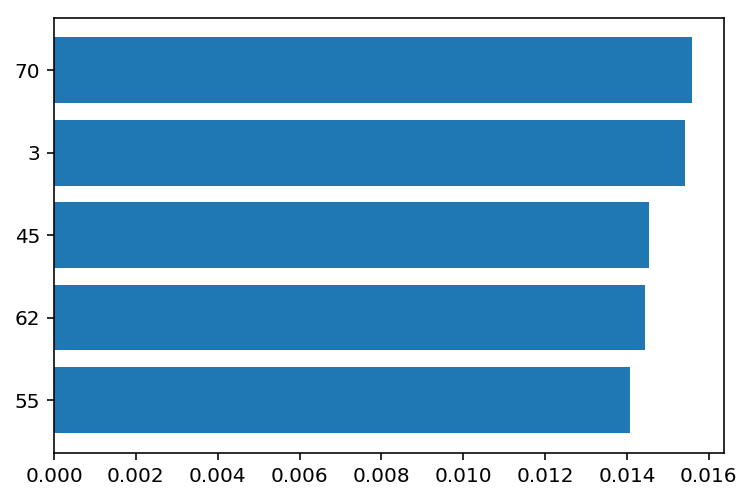

In [93]:
plt.barh(pic['classes'], pic['probs'])
#plt.xticks(classes)
#plt.xlabel('probs')
#plt.xticks(classes)
#plt.xlabel('classes')

In [97]:
frame = pd.DataFrame({"a":[9,2,5,1],"b":[4,7,-3,2],"c":[6,5,8,3]})
frame

a  b  c
0  9  4  6
1  2  7  5
2  5 -3  8
3  1  2  3

In [99]:
frame.sort_index(axis = 0,ascending = True,by = 'a')

/Users/tangjimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


a  b  c
3  1  2  3
1  2  7  5
2  5 -3  8
0  9  4  6

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in [train_dir, valid_dir]}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True)
              for x in [train_dir, valid_dir]}
class_names = image_datasets['train'].classes

In [ ]:
epochs = 3
print_every = 40
steps = 0

# change to cuda
model.to('cuda')
since = time.time()
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
for e in range(epochs):
    for phase in [train_dir, valid_dir]:
            if phase == train_dir:
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == train_dir):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == train_dir:
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == valid_dir and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    #model.load_state_dict(best_model_wts)

In [ ]:
def train_model(model, criterion, optimizer,num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in [train_dir, valid_dir]:
            if phase == train_dir:
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to('cuda')
                labels = labels.to('cuda')

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == train_dir):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == train_dir:
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == valid_dir and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    fig = plt.figure()
    image = Image.open(image_path)
    transform1 = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img_tensor = transform1(image)
    inputs = Variable(img_tensor).unsqueeze(0)
    inputs = inputs.to(device)
    output = model(inputs)
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders[valid_dir]):
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            images_so_far += 1
            ax = plt.subplot(1, 2, 1)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[1]]))
            imshow(inputs.cpu().data[1])

            
        model.train(mode=was_training)